### In this example, we apply AdaBoost on breast cancer classification

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [5]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
# y is categorical value as malignant or benign
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

In [8]:
# When dealing with categorical values, they need to be encoded as numbers
encoder = LabelEncoder()
encoded_y = pd.Series(encoder.fit_transform(y))

In [10]:
# Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state = 0, test_size = 0.3)

In [11]:
# Train an AdaBoost algorithm
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 200)

ada_clf.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [12]:
# Predcit
y_hat = ada_clf.predict(X_test)

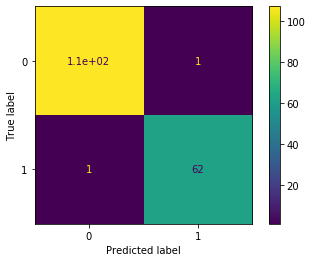

In [17]:
plot_confusion_matrix(ada_clf, X_test, y_test)
